In [268]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [260]:
df = pd.read_csv('C:/Users/keith/Desktop/Thinkful/IBM_HR_Analytics.csv')
pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [261]:
OverTime = {'Yes': 1,'No': 0} 
df.OverTime = [OverTime[item] for item in df.OverTime] # Converted OverTime column to a countable variable. 

count    237.000000
mean       0.535865
std        0.499768
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: OverTime, dtype: float64


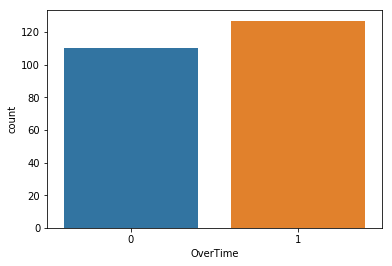

In [262]:
attr_yes = df[df['Attrition']=='Yes'] 
attr_yes[attr_yes['Department']=='Research & Development']
print(attr_yes.OverTime.describe())
sns.countplot(attr_yes.OverTime)
plt.show()

In [263]:
print ("Average number of employees with attrition working overtime" , df[df['Attrition']=='Yes'].OverTime.mean())
print ("Average number of employees without attrition working overtime" , df[df['Attrition']=='No'].OverTime.mean())

Average number of employees with attrition working overtime 0.5358649789029536
Average number of employees without attrition working overtime 0.23438767234387672


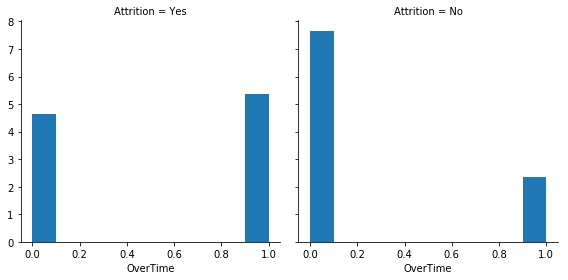

In [264]:
g = sns.FacetGrid(df, col="Attrition",height=4)
g.map(plt.hist,"OverTime",density=True);
plt.show()

In [265]:
# Ttest
ay = df[df['Attrition']=='Yes']
an = df[df['Attrition']=='No']
RnD = ay[ay['Department']=='Research & Development'].OverTime
RnD = an[an['Department']=='Research & Development'].OverTime 
stats.ttest_ind(a, b,equal_var=True)

Ttest_indResult(statistic=9.729155002966676, pvalue=1.0092540336563068e-21)

# The problem
Attrition is a problem for a company. I costs money to train new people. It loses then benifits from having expierenced employees and it can be a strain on other employees who have to cover the work for the unfilled position. From the exploration of the IBM HR Attriton data set it was observed that more employees in the "Research & Devlopement" deparment worked overtime that left the company than the employees who stayed. A ttest confirmed there was a significant difference between the means of these two groups.

# The potential solution
Putting into place a policy within the "Research & Development" department that eliminates mandatory overtime and does not place a cap on volunteer overtime. This will put less strain on eployees that do not wish to work overtime while allowing employees who like extra income to be allowed the opportunity to work. 
 

# The method of testing the solution

For this experiment we will ramdomly sample across all of IBM's Research and Developments departments. IBM has approximately 3000 employees across 12 labs in 6 continents. A random sample will be taken from each lab and a wight asigned to the sample based on the number of emplyees at each individual lab. We want a confidence level of 95% and a 5% margin of error putting our total sample at approximately 350 emplyees.<p>The key metric we will be obseriving is attrition. For two months before the test we will observe the attrition rate of each lab. After that the overtime policy will be put into place at half of the labs. For six months we with observe the attrition rate. During this time we will also observe employee job satisfaction and perfomance rating. At the end of the six months we will take the weighted attrition rates from the 12 labs and compute a total attriton rate for the labs with the policy in place and the ones without. If the rate is lower in the labs with the policy in place we will compute a ttest to confirm that the difference is significant and unlikely to be from chance. Since we have designed the expeiement in such a way that the result we see could only be from a change in the policy we will the put the policy in place in all 12 labs. If there is no significance we will assume that the current overtime policy has no effect on attrition</p>
